#Anomaly Detection & Time Series | **Assignment**

## Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.


**Answer**:

**Anomaly Detection**:
* Anomaly detection is the process of identifying unusual patterns or data points that do not conform to expected behavior.
* It is widely used in fraud detection, system monitoring, healthcare, and cybersecurity.

**Types of Anomalies**:
* Point Anomaly - A single data point is far from normal behavior. Example: A sudden 10,000 dollars credit card transaction when usual is < 100 dollars.
* Contextual Anomaly - A data point is abnormal in a specific context. Example: High temperature reading in winter(but normal in summer).
* Collective Anomaly - A group of related data points together are anomalous.
Example: Sudden spikes in network traffic indicating a DDoS attack.

## Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

**Answer**: Comparsion of Isolation Forest, DBSCAN, and Local Outlier Factor(LOF):
1. Isolation Forest:
   * Approach: Randomly partitions data to isolate anomalies (few splits = anomaly).
   * Use Case: Works well with high-dimensional datasets, scalable for large data.

2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
   * Approach: Groups dense regions; points not belonging to any cluster are anomalies.
   * Use Case: Best for spatial/geometric data, irregular cluster shapes.

3. Local Outlier Factor (LOF)
   * Approach: Compares local density of a point to neighbors; low-density = anomaly.
   * Use Case: Good when anomalies depend on local context, not global distribution.

## Question 3: What are the key components of a Time Series? Explain each with one example.



**Answer**:

**Key Components of a Time Series:**
* Level - The base value of a series on which other components are added.
* Trend - Long term movement or direction in data over a long period of time. It can be Upward, Downward or horizontal. Example: Steady rise in global average temperature over decades.
* Seasonality - Repeated patterns at fixed intervals. Example: Higher ice cream sales every summer.
* Cyclicity/Cycle - The fluctuations in the data over a longer period of ti,e. These periods of time are not fixed and can vary.
* Noise: Some uncertainity/randomness in time series data because of unexpected reasons.

## Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?




**Answer**:

**Stationarity in Time Series**

  * A time series is stationaty if its statistical properties (mean, variance, autocorrelation) remain constant over time.
  * Important for forecasting models like ARIMA that assume stationarity.

**How to Test:**

  * Visual Inspection: Plot shows constant mean/variance.

  * Statistical Tests: Augmented Dickey-Fuller (ADF), KPSS test.

**How to Transform Non-Stationary to Stationary:**

  * Differencing: Subtract previous value from current value.

  * Log/Power Transformations: Reduce variance trends.

  * Detrending/Seasonal Adjustment: Remove trend or seasonality components.

## Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.



**Answer**:
Differences Between AR, MA, ARIMA, SARIMA, and SARIMAX:

1. AR (Auto-Regressive)

   * Structure: Uses past values of the series.

   * Application: Stock prices depending on their own past values.

2. MA (Moving Average)

   * Structure: Uses past forecast errors (residuals).

   * Application: Noise smoothing in time series.

3. ARIMA (Auto-Regressive Integrated Moving Average)

   * Structure: Combines AR + MA + differencing (to handle non-stationarity).

   * Application: General forecasting for non-stationary series.

4. SARIMA (Seasonal ARIMA)

   * Structure: ARIMA + seasonal terms.

   * Application: Forecasting with seasonality (e.g., monthly sales).

5. SARIMAX (Seasonal ARIMA with Exogenous Variables)

   * Structure: SARIMA + external factors.

   * Application: Sales forecast with promotions or holidays as external inputs.

## Dataset:
* ### NYC Taxi Fare Data
* ### AirPassengers Dataset
## Question 6:
###Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components. (Include your Python code and output in the code box below.)


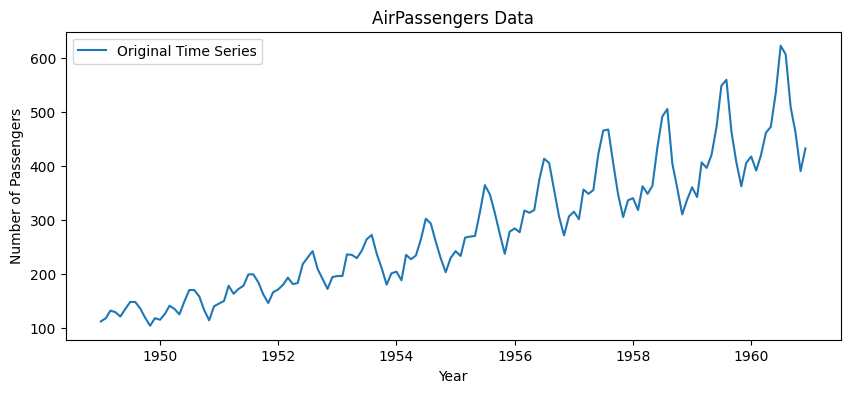

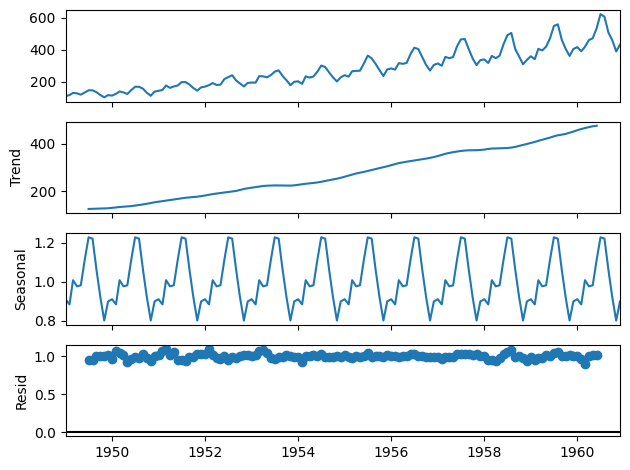

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the Data
dataset = pd.read_csv("/content/Dataset/AirPassengers.csv", parse_dates=['Month'], index_col='Month')

# Ensure index is datetime
dataset.index = pd.to_datetime(dataset.index)

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(dataset, label="Original Time Series")
plt.title("AirPassengers Data")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Decompose the series
decomposition = seasonal_decompose(dataset, model='multiplicative')

# Plot decomposition
decomposition.plot()
plt.show()

## Question 7:
###Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.(Include your Python code and output in the code box below.)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/Dataset/NYC_taxi_fare_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416335 entries, 0 to 6416334
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             object 
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(11), int64(2), object(5)
memory usage: 881.1+ MB


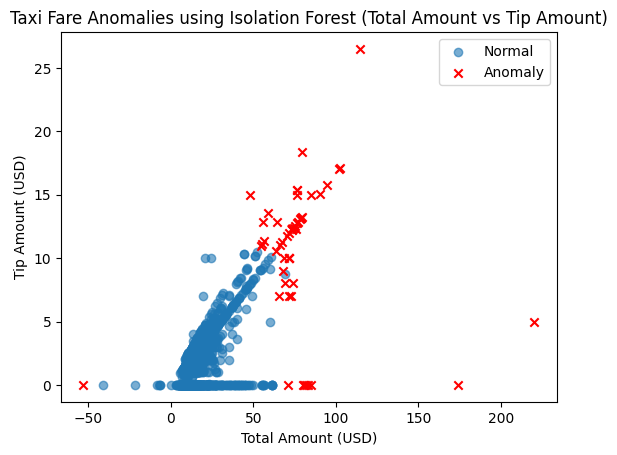

In [ ]:
# Use total_amount and tip_amount columns for anomaly detection
X = df[['total_amount','tip_amount']].dropna().sample(2000, random_state=42).copy()

# Apply Isolation Forest
iso = IsolationForest(contamination=0.03, random_state=0)
X['anomaly'] = iso.fit_predict(X)

# Separate normal vs anomalies
normal = X[X['anomaly']==1]
outliers = X[X['anomaly']==-1]

# Plot scatter
plt.scatter(normal['total_amount'], normal['tip_amount'], label="Normal", alpha=0.6)
plt.scatter(outliers['total_amount'], outliers['tip_amount'], label="Anomaly", marker="x", c="red")
plt.title("Taxi Fare Anomalies using Isolation Forest (Total Amount vs Tip Amount)")
plt.xlabel("Total Amount (USD)");
plt.ylabel("Tip Amount (USD)");
plt.legend();
plt.show()

## Question 8:  
###Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results. (Include your Python code and output in the code box below.)


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("/content/Dataset/AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#Handle common column names
date_col = "Month" if "Month" in df.columns else "month"
value_col_candidates = ["#Passengers", "Passengers", "AirPassengers", "value", "passengers"]
value_col = next(c for c in value_col_candidates if c in df.columns)

In [ ]:
#Build monthly time series
y = pd.Series(df[value_col].values, index=pd.to_datetime(df[date_col]), name="Passengers").asfreq("MS")

In [ ]:
y

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Fit SARIMA(p=1,d=1,q=1) × (P=1,D=1,Q=1, s=12)
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

In [ ]:
# Forecast next 12 months
fc = res.get_forecast(steps=12)
mean_fc = fc.predicted_mean
ci = fc.conf_int()

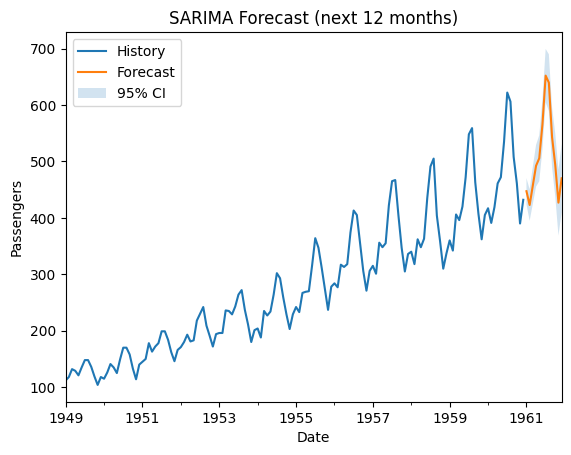

In [ ]:
# Plot history + forecast + CI
y.plot(label="History")
mean_fc.plot(label="Forecast")
plt.fill_between(mean_fc.index, ci.iloc[:,0].values, ci.iloc[:,1].values, alpha=0.2, label="95% CI")
plt.title("SARIMA Forecast (next 12 months)")
plt.xlabel("Date");plt.ylabel("Passengers"); plt.legend(); plt.show()

## Question 9:
###Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib. (Include your Python code and output in the code box below.)

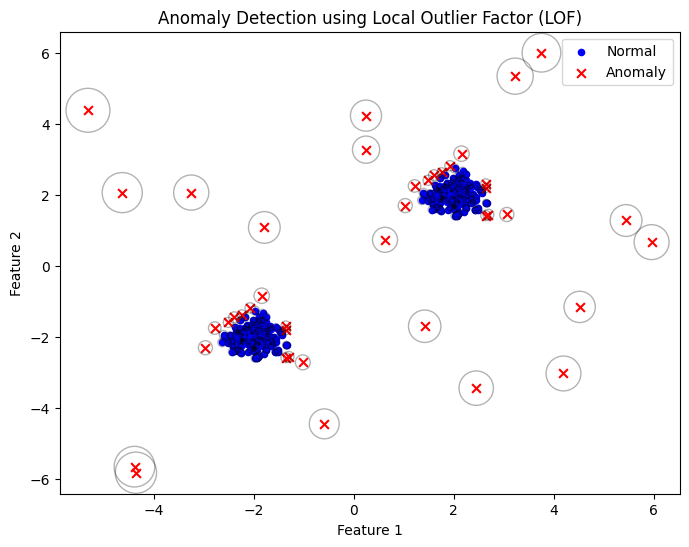

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic dataset
np.random.seed(42)

# Normal data
X_inliers = 0.3 * np.random.randn(200,2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Outlier points (random spread)
X_outliers = np.random.uniform(low=-6, high=6, size=(20,2))

#Combine dataset
X = np.r_[X_inliers, X_outliers]

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
scores = lof.negative_outlier_factor_

# Seperate inliers vs outliers
inliers = X[y_pred == 1]
outliers = X[y_pred == -1]

#Visualization
plt.figure(figsize=(8,6))
plt.scatter(inliers[:,0], inliers[:,1], c='blue', s=20, label='Normal')
plt.scatter(outliers[:,0], outliers[:,1], c='red', s=40, marker='x', label='Anomaly')

# Visualize anomaly score as circle size
radius = (scores.max() - scores) / (scores.max() - scores.min())
plt.scatter(X[:,0], X[:,1], s=1000*radius, edgecolors="k", facecolors="none", alpha=0.3)

plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Question 10:  
###You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage. Explain your real-time data science workflow:
* How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
* Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
* How would you validate and monitor the performance over time?
* How would this solution help business decisions or operations?

(Include your Python code and output in the code box below.)


**Answer:**
1. Detect anomalies in streaming data
   * Use Isolation Forest (robust for real-time, high-dimensional features like region + weather + usage).
   * Apply it on a sliding window of last N records (e.g., last 7 days).
   * Flag unusual spikes/drops in energy usage.
   * Choice: Isolation Forest (scales better for streaming).

2. Short-term forecasting model
   * Energy usage has trend + daily/weekly seasonality + weather impact.
   * SARIMAX is ideal because it handles seasonality and allows exogenous variables (e.g., temperature, humidity).
   * Choice: SARIMAX (for 12–48 hour forecast).

3. Validation & Monitoring
   * Offline: rolling forecast origin validation (simulate real-time).
   * Metrics: MAPE/RMSE for forecasting, Precision/Recall for anomaly detection.
   * Online: track forecast errors in production, trigger retrain when errors drift.

4. Business impact
   * Helps grid operators schedule generation to avoid blackouts.
   * Detects equipment faults, cyberattacks, or unusual consumption early.
   * Enables demand response (alert industries to reduce usage when spikes are predicted).
   * Optimizes cost & fuel efficiency by preventing overproduction.

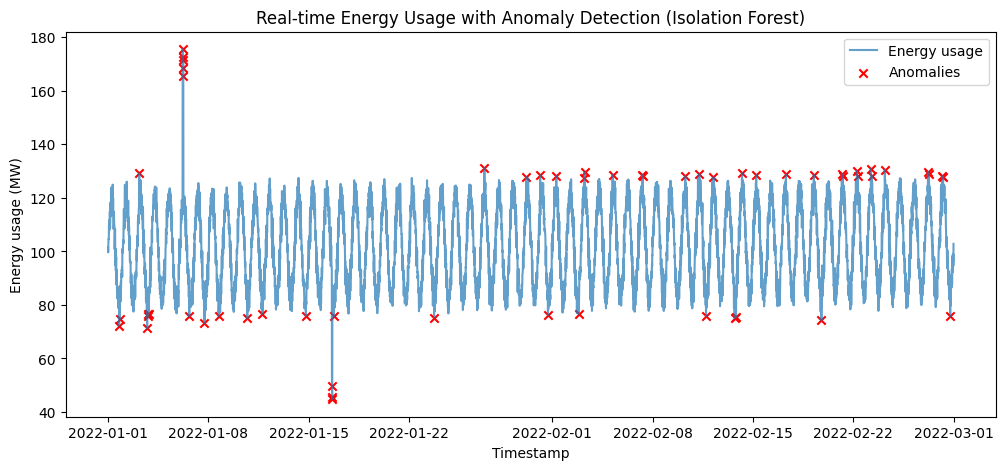

/tmp/ipython-input-78930467.py:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df["energy_usage"].resample("H").mean()


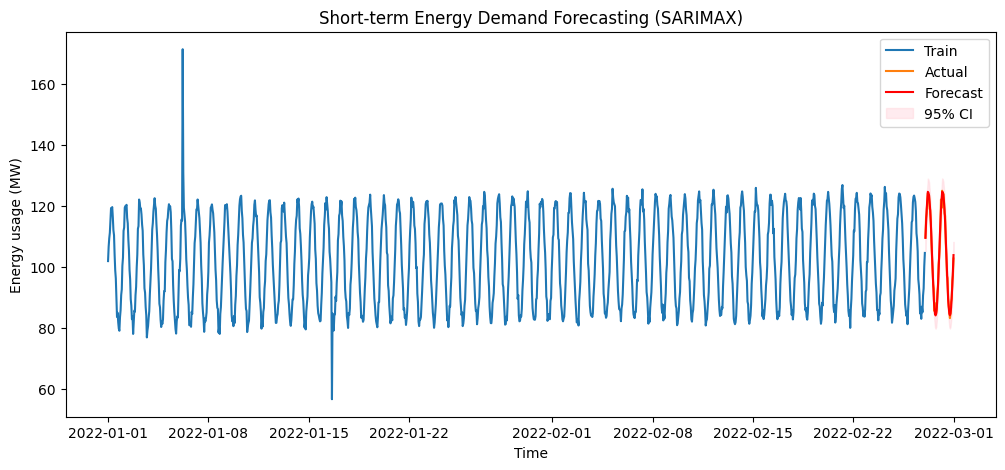

Detected anomalies:
                      energy_usage  anomaly
timestamp                                 
2022-01-01 18:30:00     72.226831       -1
2022-01-01 19:45:00     74.804844       -1
2022-01-03 04:15:00    129.136801       -1
2022-01-03 17:30:00     71.215780       -1
2022-01-03 18:15:00     76.514749       -1 

Forecast for next 48 hours:
 2022-02-27 01:00:00    109.588335
2022-02-27 02:00:00    114.229514
2022-02-27 03:00:00    118.673713
2022-02-27 04:00:00    121.773345
2022-02-27 05:00:00    124.661055
Freq: h, Name: predicted_mean, dtype: float64


In [5]:
# Real-time Energy Demand Forecasting + Anomaly Detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ----------------------------
# 1. Simulate synthetic energy demand dataset
# ----------------------------
np.random.seed(42)
date_rng = pd.date_range(start="2022-01-01", end="2022-03-01", freq="15min")
n = len(date_rng)

# Seasonal demand + weather effect + noise
daily_pattern = 100 + 20*np.sin(2*np.pi*date_rng.hour/24)  # daily seasonality
weather_effect = 5*np.sin(2*np.pi*date_rng.dayofyear/365) # seasonal weather
noise = np.random.normal(0, 3, n)

energy = np.array(daily_pattern + weather_effect + noise)

# Inject anomalies (spikes/drops)
energy[500:505] += 50   # spike
energy[1500:1503] -= 40 # drop

df = pd.DataFrame({"timestamp": date_rng, "energy_usage": energy})
df.set_index("timestamp", inplace=True)

# ----------------------------
# 2. Anomaly Detection with Isolation Forest
# ----------------------------
iso = IsolationForest(contamination=0.01, random_state=0)
df["anomaly"] = iso.fit_predict(df[["energy_usage"]])  # -1 = anomaly, 1 = normal

# Separate normal vs anomalies
normal = df[df["anomaly"] == 1]
outliers = df[df["anomaly"] == -1]

# Plot anomalies
plt.figure(figsize=(12,5))
plt.plot(df.index, df["energy_usage"], label="Energy usage", alpha=0.7)
plt.scatter(outliers.index, outliers["energy_usage"], color="red", label="Anomalies", marker="x")
plt.title("Real-time Energy Usage with Anomaly Detection (Isolation Forest)")
plt.xlabel("Timestamp")
plt.ylabel("Energy usage (MW)")
plt.legend()
plt.show()

# ----------------------------
# 3. Forecasting with SARIMAX
# ----------------------------
# Resample to hourly to reduce data size
hourly = df["energy_usage"].resample("H").mean()

# Train-test split
train = hourly[:-48]   # all except last 48 hours
test = hourly[-48:]    # last 48 hours

# SARIMAX (p,d,q)(P,D,Q,s) with daily seasonality (24 hours)
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,24))
res = model.fit(disp=False)

# Forecast next 48 hours
pred = res.get_forecast(steps=48)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# ----------------------------
# 4. Visualization of Forecast
# ----------------------------
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual")
plt.plot(pred_mean.index, pred_mean, label="Forecast", color="red")

# Confidence interval
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1],
                 color="pink", alpha=0.3, label="95% CI")

plt.title("Short-term Energy Demand Forecasting (SARIMAX)")
plt.xlabel("Time")
plt.ylabel("Energy usage (MW)")
plt.legend()
plt.show()

# ----------------------------
# 5. Output anomaly detection & forecast table
# ----------------------------
print("Detected anomalies:\n", outliers.head(), "\n")
print("Forecast for next 48 hours:\n", pred_mean.head())
